# Unsupervised Learning Project

## Credit Card Customer Segmentation

### Import libraries, load data, set up options and methods

In [1]:
# Import packages and libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from IPython.core.interactiveshell import InteractiveShell

In [3]:
# Set package options

# Display multiple outputs for a single cell
InteractiveShell.ast_node_interactivity

# Don't show warnings for large number of figures
plt.rc('figure', max_open_warning=0)

# Display plots inline
%matplotlib inline

# Don't truncate columns for head()
pd.set_option('display.max_columns', None)

# Seaborn settings
sns.set(color_codes=True)
sns.set_style(style='darkgrid')

In [8]:
# Load data
data = pd.read_csv('ccdata.csv', index_col='Sl_No')

In [22]:
# Methods and variables for future use
figx = 10
figy = 8

def dist(col):
    plt.figure(figsize=(figx,figy))
    sns.distplot(col);
    
def hist(col):
    plt.figure(figsize=(figx,figy))
    plt.hist(col)
    plt.axvline(col.mean(), color='y', linewidth=2, label='Mean')
    plt.axvline(col.median(), color='g', linewidth=2, label='Median')
    plt.legend();
    
def box(col):
    plt.figure(figsize=(figx,figy))
    sns.boxplot(col);
    
def print_summary(col):
    dist(col)
    hist(col)
    box(col)
    print(col.describe())
    print('')
    print('Unique values: ' + str(col.nunique()))

### Superficial data analysis

In [12]:
data.head()

,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
Sl_No,,,,,,
1,87073,100000,2,1,1,0
2,38414,50000,3,0,10,9
3,17341,50000,7,1,3,4
4,40496,30000,5,1,1,4
5,47437,100000,6,0,12,3


In [13]:
data.shape

(660, 6)

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 660 entries, 1 to 660
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Customer Key         660 non-null    int64
 1   Avg_Credit_Limit     660 non-null    int64
 2   Total_Credit_Cards   660 non-null    int64
 3   Total_visits_bank    660 non-null    int64
 4   Total_visits_online  660 non-null    int64
 5   Total_calls_made     660 non-null    int64
dtypes: int64(6)
memory usage: 36.1 KB


# todo - duplicate checking

### Univariate analysis

#### Average credit limit

count       660.000000
mean      34574.242424
std       37625.487804
min        3000.000000
25%       10000.000000
50%       18000.000000
75%       48000.000000
max      200000.000000
Name: Avg_Credit_Limit, dtype: float64

Unique values: 110


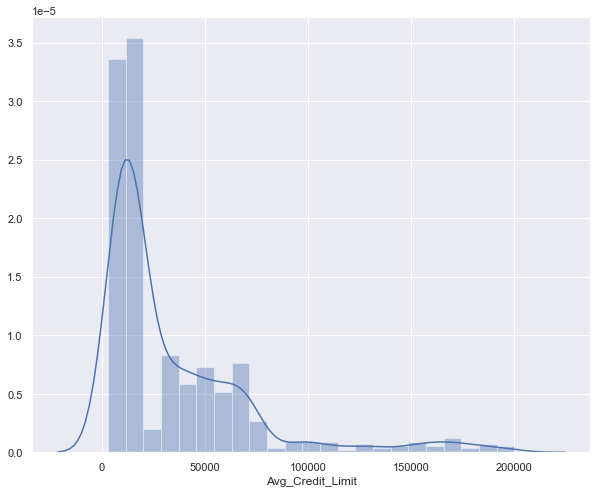

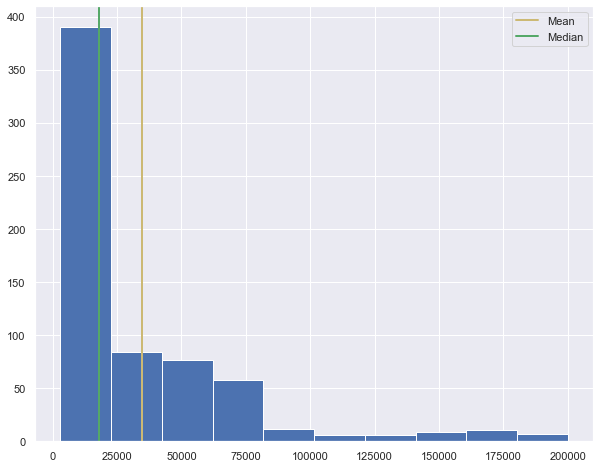

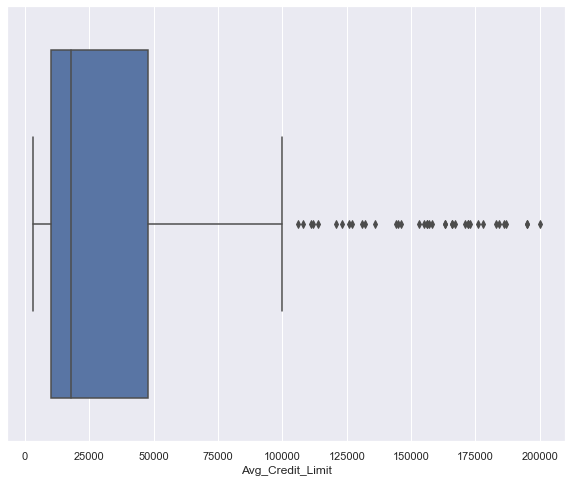

In [29]:
print_summary(data['Avg_Credit_Limit'])

#### Total credit cards

count    660.000000
mean       4.706061
std        2.167835
min        1.000000
25%        3.000000
50%        5.000000
75%        6.000000
max       10.000000
Name: Total_Credit_Cards, dtype: float64

Unique values: 10


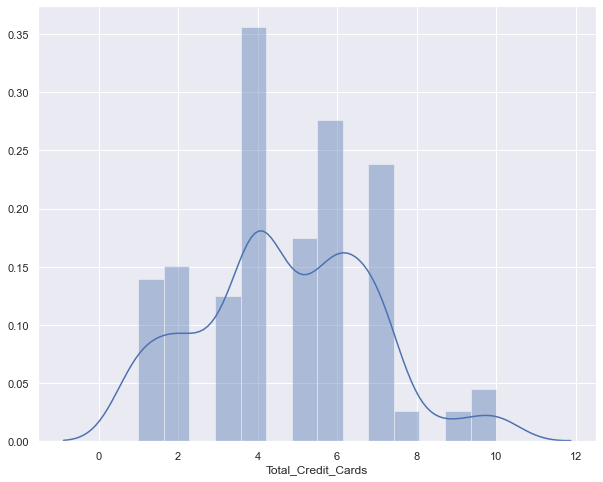

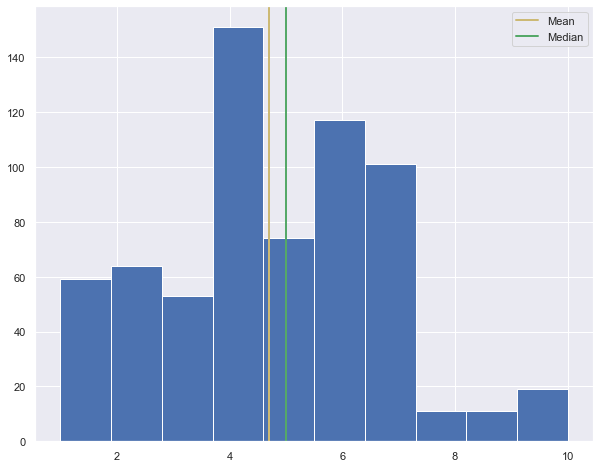

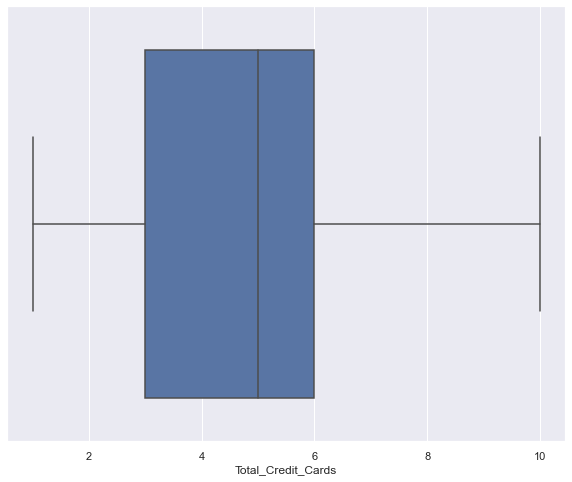

In [28]:
print_summary(data['Total_Credit_Cards'])

#### Total visits (bank)

count    660.000000
mean       2.403030
std        1.631813
min        0.000000
25%        1.000000
50%        2.000000
75%        4.000000
max        5.000000
Name: Total_visits_bank, dtype: float64

Unique values: 6


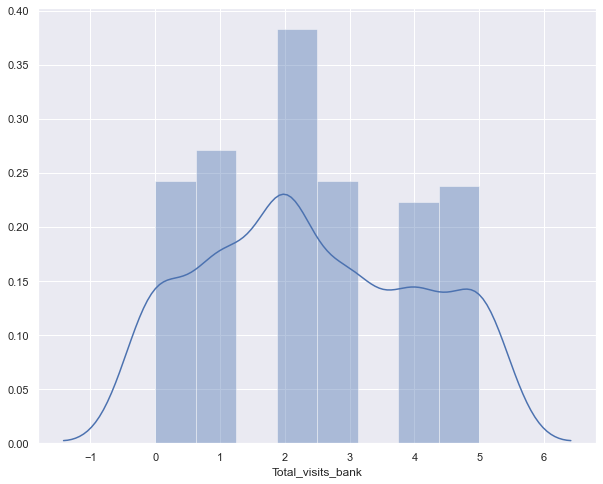

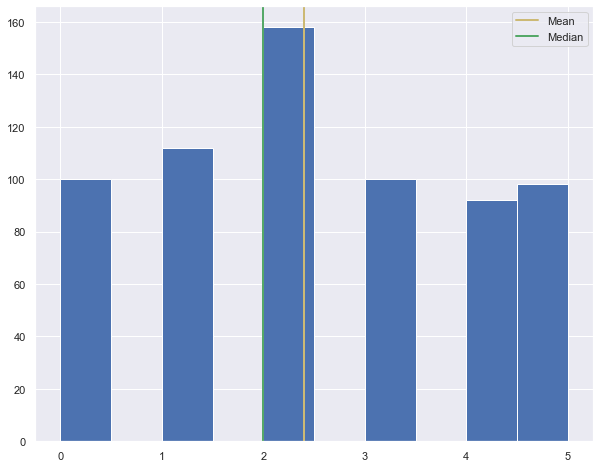

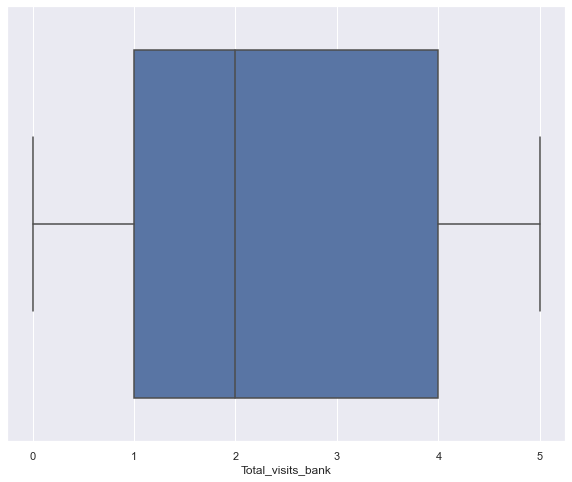

In [27]:
print_summary(data['Total_visits_bank'])

#### Total visits (online)

count    660.000000
mean       2.606061
std        2.935724
min        0.000000
25%        1.000000
50%        2.000000
75%        4.000000
max       15.000000
Name: Total_visits_online, dtype: float64

Unique values: 16


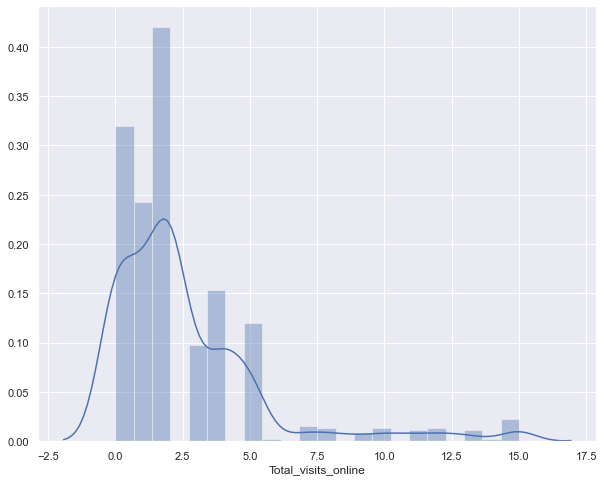

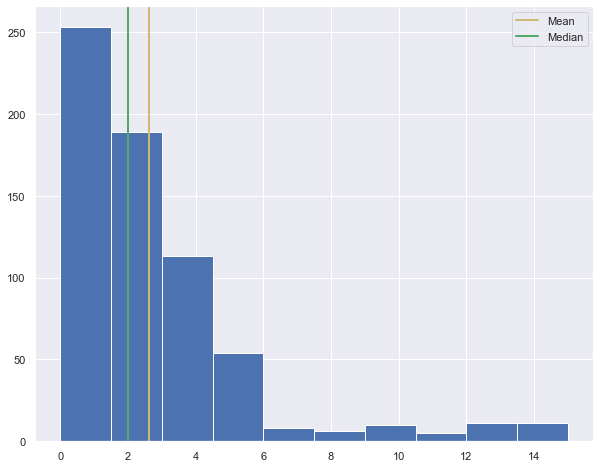

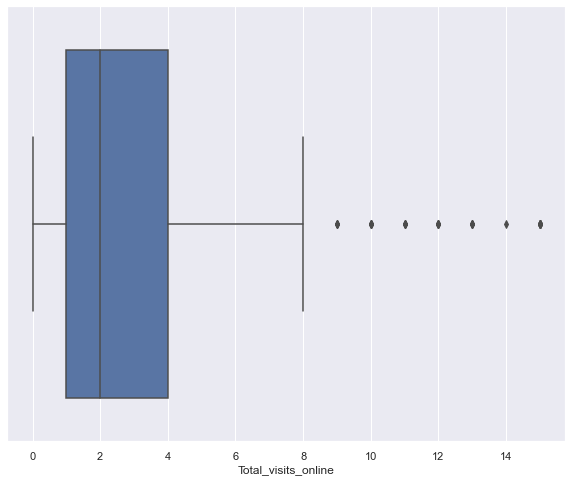

In [26]:
print_summary(data['Total_visits_online'])

#### Total calls made

count    660.000000
mean       3.583333
std        2.865317
min        0.000000
25%        1.000000
50%        3.000000
75%        5.000000
max       10.000000
Name: Total_calls_made, dtype: float64

Unique values: 11


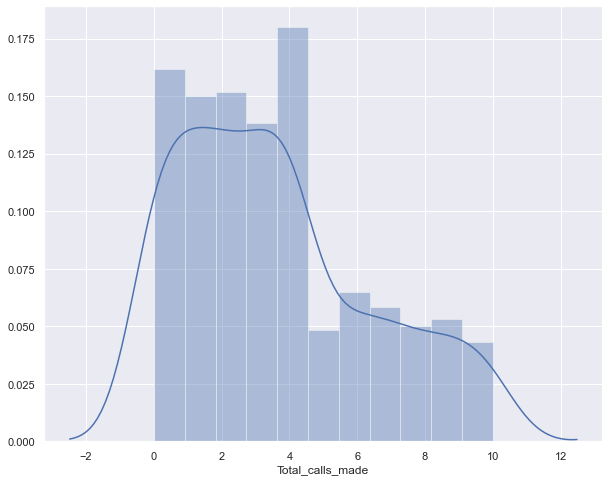

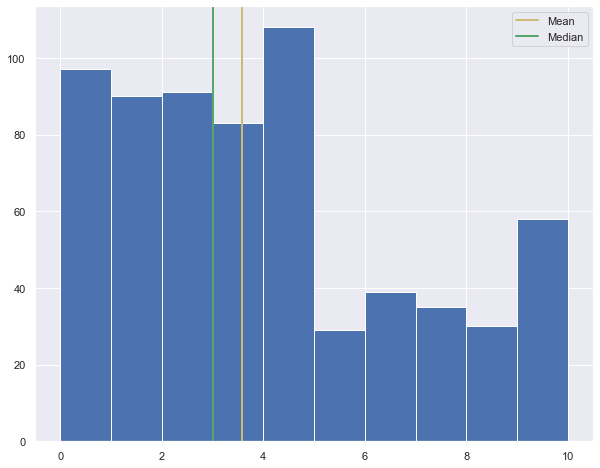

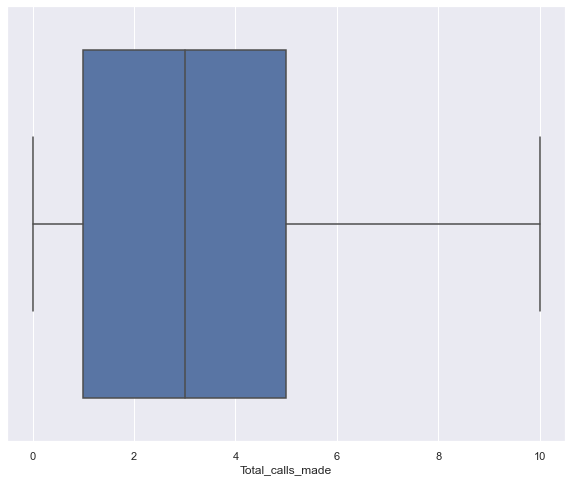

In [30]:
print_summary(data['Total_calls_made'])

### Bivariate Analysis

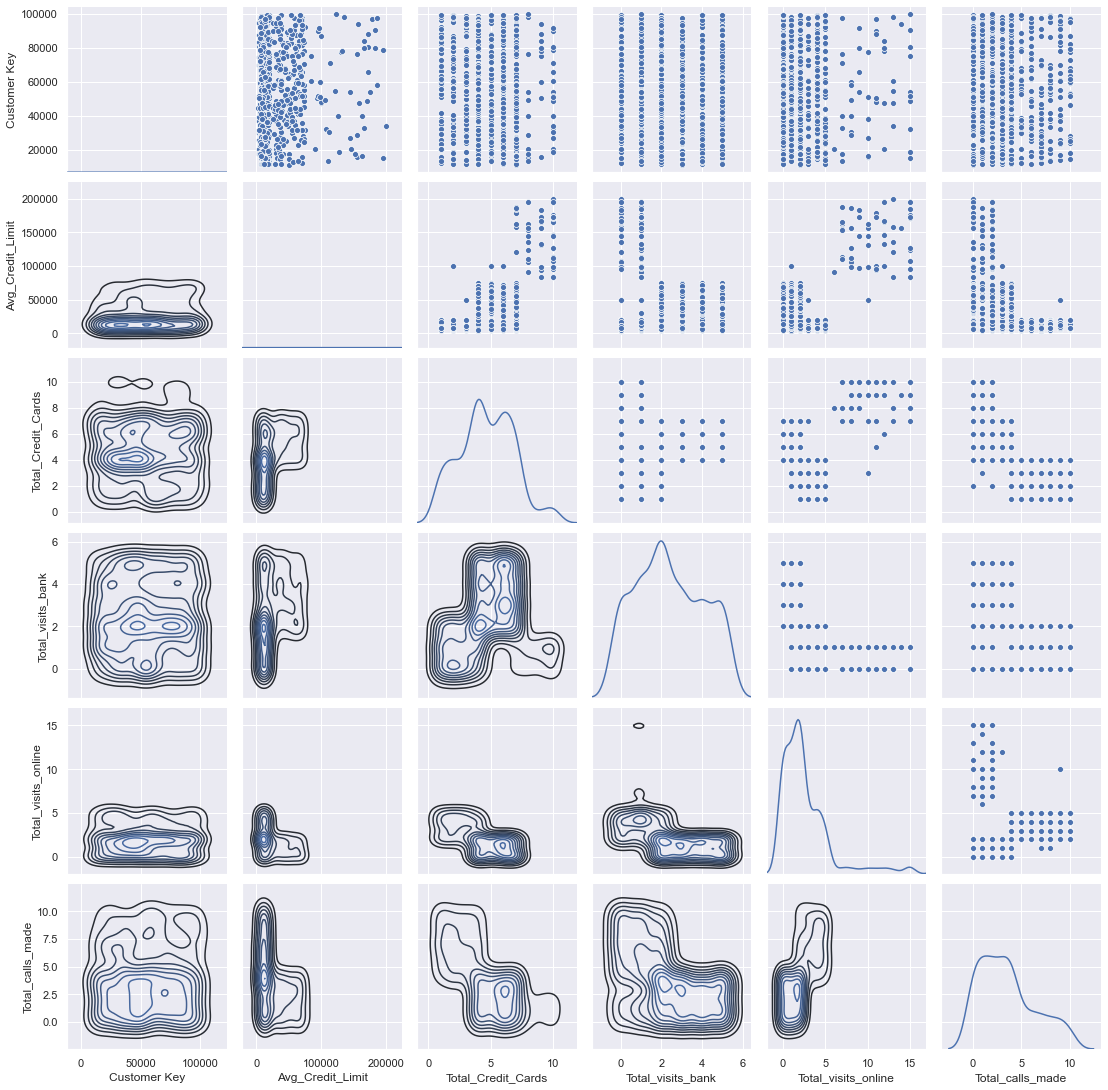

In [31]:
g = sns.PairGrid(data);

g.map_upper(sns.scatterplot)
g.map_lower(sns.kdeplot)
g.map_diag(sns.kdeplot)

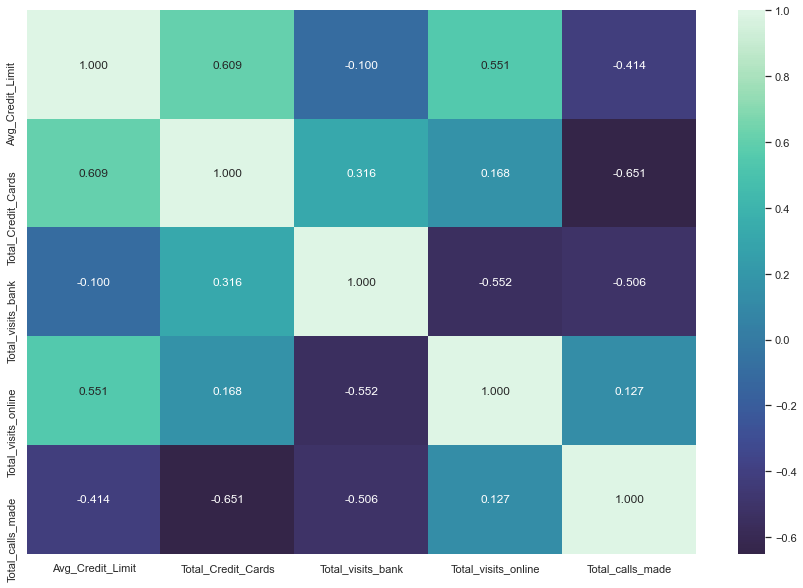

In [36]:
plt.figure(figsize=(15,10))
sns.heatmap(data[['Avg_Credit_Limit',
                  'Total_Credit_Cards',
                  'Total_visits_bank',
                  'Total_visits_online',
                  'Total_calls_made']].corr(), annot=True, vmin=-.651, cmap='mako', center=0, fmt='.3f');

## Scale data

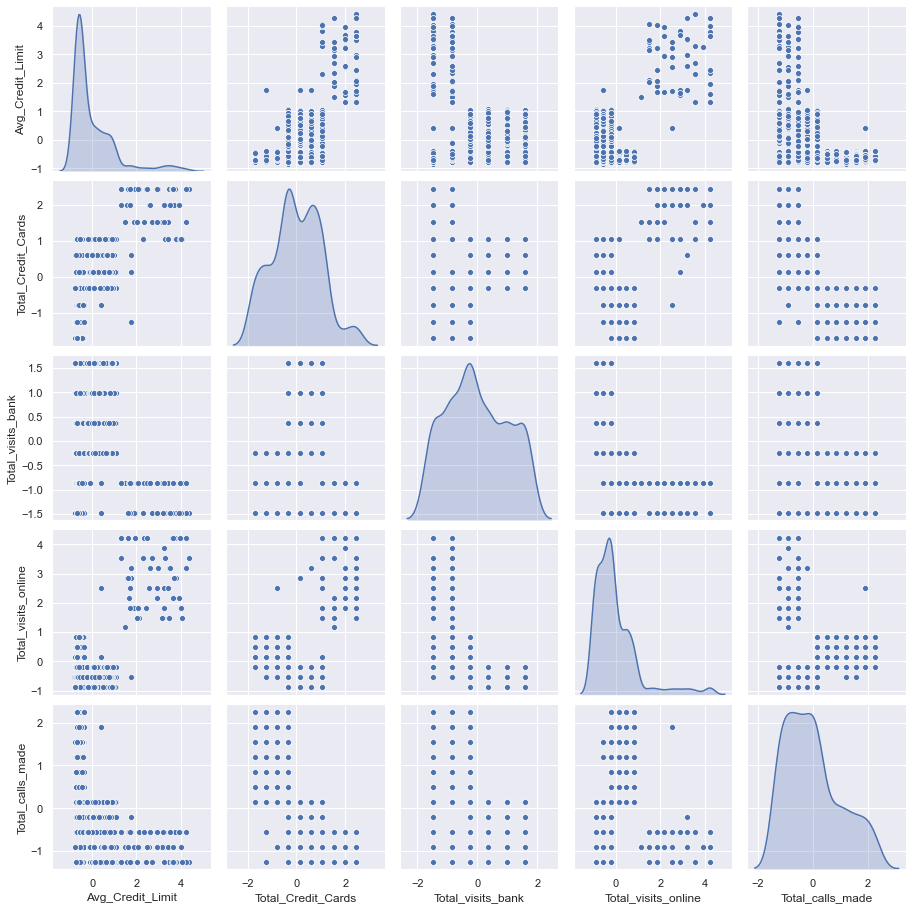

In [41]:
from scipy.stats import zscore

# Remove the customer key, which should be ignored for clustering
attr = data.iloc[:,1:]
scaled = attr.apply(zscore)

sns.pairplot(scaled, diag_kind='kde');

## Analyze cluster options with elbow and box plots

Text(0.5, 1.0, 'Selecting k with elbow method')

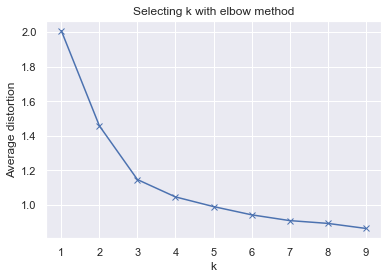

In [44]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

clusters = range(1,10)
mean_distortions = []

for k in clusters:
    model = KMeans(n_clusters=k)
    model.fit(scaled)
    prediction = model.predict(scaled)
    mean_distortions.append(sum(np.min(cdist(scaled, model.cluster_centers_, 'euclidean'), axis=1)) / scaled.shape[0])
    
plt.plot(clusters, mean_distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting k with elbow method')

In [47]:
three_group = KMeans(3)
three_group.fit(scaled)
prediction = three_group.predict(scaled)

data['K3'] = prediction
scaled['K3'] = prediction

scaled_cluster = scaled.groupby(['K3'])
scaled_cluster.mean()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
K3,,,,,
0,2.831764,1.862226,-1.105763,2.827319,-0.874330
1,-0.595796,-1.059623,-0.901518,0.322997,1.148109
2,-0.021062,0.373690,0.666395,-0.553672,-0.553005


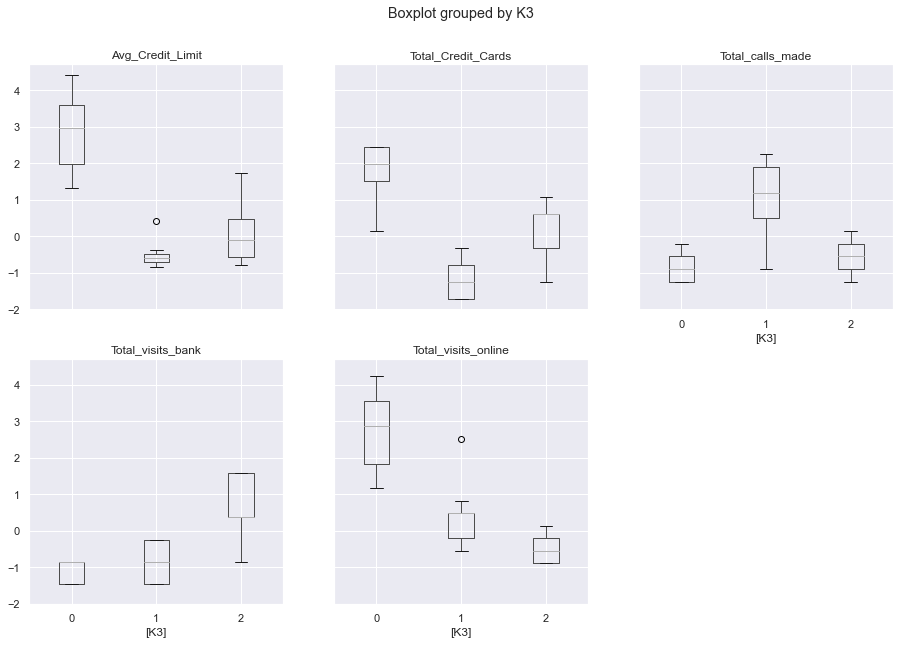

In [50]:
scaled.boxplot(by='K3', layout=(2,3), figsize=(15,10));